In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')

In [4]:
data = pd.read_csv("Coursera.csv")
data.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


### Basic Data Analysis

In [5]:
data.shape

(3522, 7)

In [6]:
data['Difficulty Level'].value_counts()

Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: Difficulty Level, dtype: int64

In [7]:
data['Course Rating'].value_counts()

4.7               740
4.6               623
4.8               598
4.5               389
4.4               242
4.9               180
4.3               165
4.2               121
5                  90
4.1                85
Not Calibrated     82
4                  51
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: Course Rating, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [9]:
data.isnull().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [10]:
data['Difficulty Level'].value_counts()

Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: Difficulty Level, dtype: int64

In [11]:
data['Course Rating'].value_counts()

4.7               740
4.6               623
4.8               598
4.5               389
4.4               242
4.9               180
4.3               165
4.2               121
5                  90
4.1                85
Not Calibrated     82
4                  51
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: Course Rating, dtype: int64

In [12]:
num_of_users = data['Course Rating'].value_counts()
num_of_users

4.7               740
4.6               623
4.8               598
4.5               389
4.4               242
4.9               180
4.3               165
4.2               121
5                  90
4.1                85
Not Calibrated     82
4                  51
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: Course Rating, dtype: int64

In [13]:
data['University'].value_counts()

Coursera Project Network                      562
University of Illinois at Urbana-Champaign    138
Johns Hopkins University                      110
University of Michigan                        101
University of Colorado Boulder                101
                                             ... 
GitLab                                          1
Yeshiva University                              1
University of Glasgow                           1
Laureate Education                              1
The World Bank Group                            1
Name: University, Length: 184, dtype: int64

In [14]:
data['Course Name']

0       Write A Feature Length Screenplay For Film Or ...
1       Business Strategy: Business Model Canvas Analy...
2                           Silicon Thin Film Solar Cells
3                                    Finance for Managers
4            Retrieve Data using Single-Table SQL Queries
                              ...                        
3517    Capstone: Retrieving, Processing, and Visualiz...
3518                     Patrick Henry: Forgotten Founder
3519    Business intelligence and data analytics: Gene...
3520                                  Rigid Body Dynamics
3521    Architecting with Google Kubernetes Engine: Pr...
Name: Course Name, Length: 3522, dtype: object

In [15]:
new_data = data[['Course Name','Difficulty Level','Course Description','Skills']]

In [16]:
new_data.head(5)

,Course Name,Difficulty Level,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Beginner,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Beginner,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,Advanced,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,Intermediate,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Beginner,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


### EDA

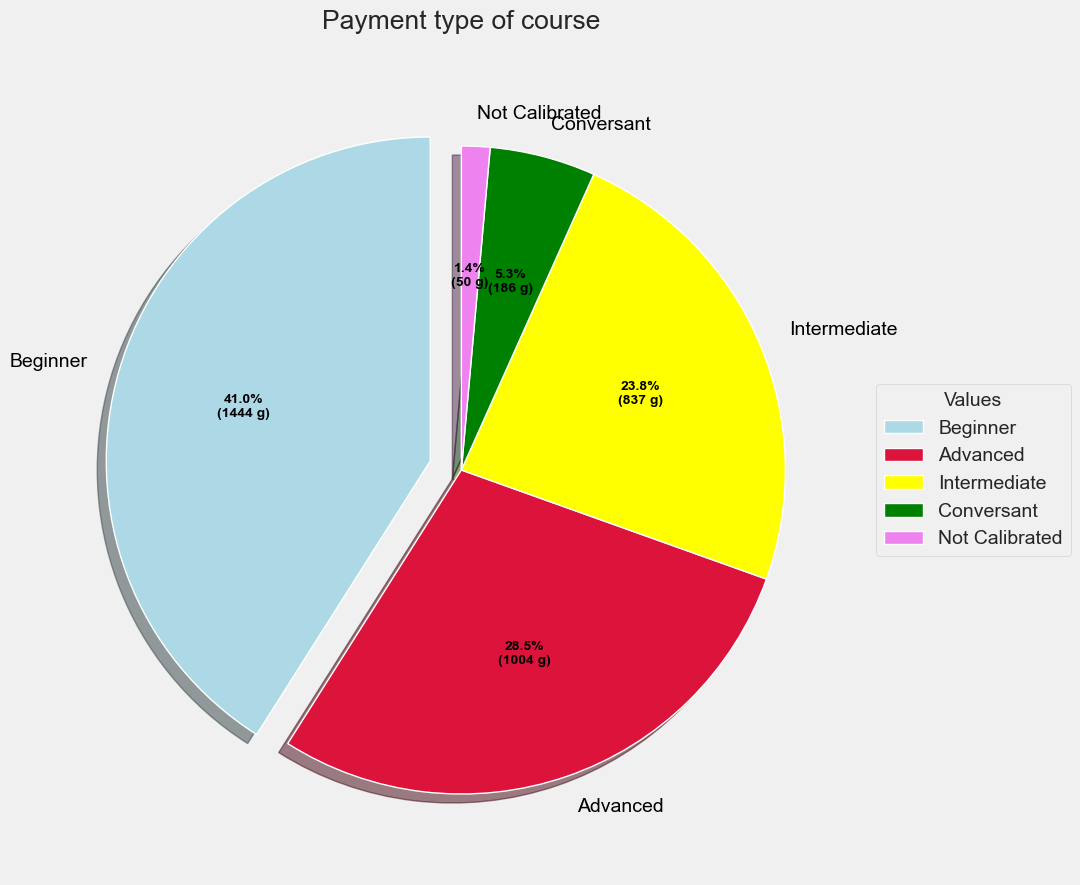

In [17]:
mag = ['Beginner','Advanced','Intermediate','Conversant','Not Calibrated']

data = [1444,1005,837,186,50]
explode = (0.1,0.0,0.0,0.0,0.0)

# Creating color parameters
colors = ("lightblue","crimson","yellow","green","violet")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "white" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(15, 10))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = mag,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, mag,
          title ="Values",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("Payment type of course\n",size=19)

# show plot

plt.show()

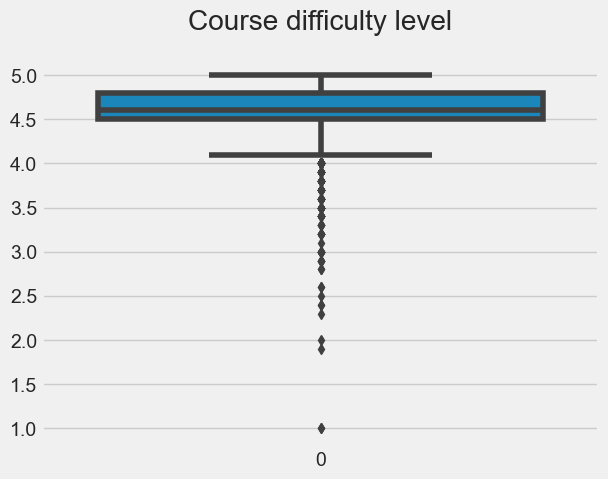

In [18]:
import pandas as pd
import seaborn as sns

# Load the data
data = pd.read_csv('Coursera.csv')

# Convert the 'Course Rating' column to a numeric column
data['Course Rating'] = pd.to_numeric(data['Course Rating'], errors='coerce')

# Remove non-numeric values from the 'Course Rating' column
data['Course Rating'] = data['Course Rating'].dropna()

# Create a boxplot of the course ratings
sns.boxplot(data['Course Rating']);

# Add a title to the plot
plt.title('Course difficulty level', pad=20)

# Show the plot
plt.show()



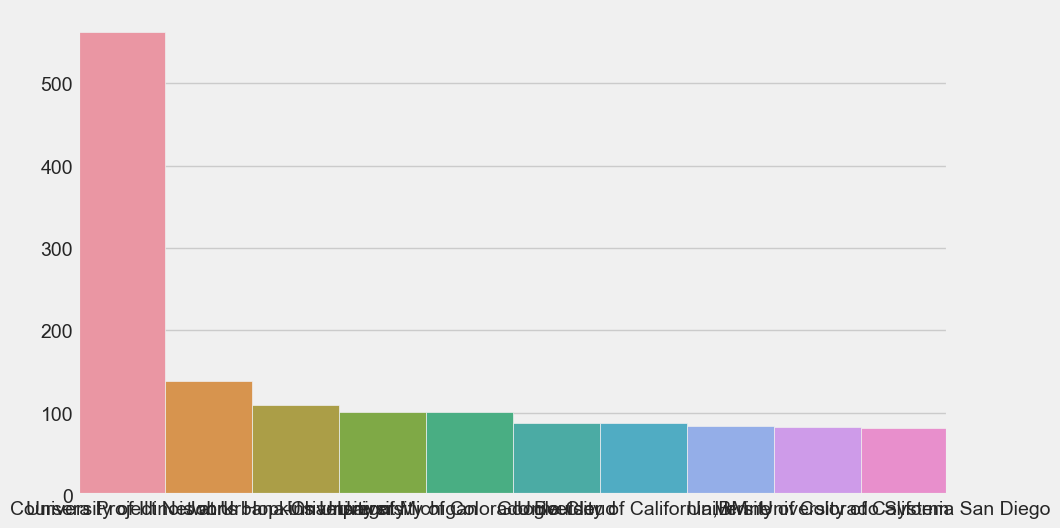

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Coursera.csv')

# Get the most popular universities
popular_universities = data['University'].value_counts().nlargest(10)

# Create a figure
plt.figure('Most Popular Universities', figsize=(10, 6))

# Create a bar plot
sns.barplot(x=popular_universities.index, y=popular_universities.values, width=1)

# Show the plot
plt.show()


In [20]:
new_data.columns

Index(['Course Name', 'Difficulty Level', 'Course Description', 'Skills'], dtype='object')

In [21]:
# Removing spaces between the words (Lambda funtions can be used as well)

new_data['Course Name'] = new_data['Course Name'].str.replace(' ',',')
new_data['Course Name'] = new_data['Course Name'].str.replace(',,',',')
new_data['Course Name'] = new_data['Course Name'].str.replace(':','')
new_data['Course Description'] = new_data['Course Description'].str.replace(' ',',')
new_data['Course Description'] = new_data['Course Description'].str.replace(',,',',')
new_data['Course Description'] = new_data['Course Description'].str.replace('_','')
new_data['Course Description'] = new_data['Course Description'].str.replace(':','')
new_data['Course Description'] = new_data['Course Description'].str.replace('(','')
new_data['Course Description'] = new_data['Course Description'].str.replace(')','')

#removing paranthesis from skills columns
new_data['Skills'] = new_data['Skills'].str.replace('(','')
new_data['Skills'] = new_data['Skills'].str.replace(')','')

C:\Users\aniku\AppData\Local\Temp\ipykernel_7668\1097479083.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_data['Course Description'] = new_data['Course Description'].str.replace('(','')
C:\Users\aniku\AppData\Local\Temp\ipykernel_7668\1097479083.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_data['Course Description'] = new_data['Course Description'].str.replace(')','')
C:\Users\aniku\AppData\Local\Temp\ipykernel_7668\1097479083.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_data['Skills'] 

In [22]:
new_data.head(5)

,Course Name,Difficulty Level,Course Description,Skills
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...",Beginner,"Write,a,Full,Length,Feature,Film,Script,In,thi...",Drama Comedy peering screenwriting film D...
1,"Business,Strategy,Business,Model,Canvas,Analys...",Beginner,"By,the,end,of,this,guided,project,you,will,be,...",Finance business plan persona user experienc...
2,"Silicon,Thin,Film,Solar,Cells",Advanced,"This,course,consists,of,a,general,presentation...",chemistry physics Solar Energy film lambda...
3,"Finance,for,Managers",Intermediate,"When,it,comes,to,numbers,there,is,always,more,...",accounts receivable dupont analysis analysis...
4,"Retrieve,Data,using,Single-Table,SQL,Queries",Beginner,"In,this,course,you�ll,learn,how,to,effectively...",Data Analysis select sql database management...


# Tags Coloumn

### The tags column is the combination of the following columns : Course Name + Difficulty Level + Course Description + Skills

In [23]:
new_data['tags'] = new_data['Course Name'] + new_data['Difficulty Level'] + new_data['Course Description'] + new_data['Skills']

In [24]:
new_data.head(5)

,Course Name,Difficulty Level,Course Description,Skills,tags
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...",Beginner,"Write,a,Full,Length,Feature,Film,Script,In,thi...",Drama Comedy peering screenwriting film D...,"Write,A,Feature,Length,Screenplay,For,Film,Or,..."
1,"Business,Strategy,Business,Model,Canvas,Analys...",Beginner,"By,the,end,of,this,guided,project,you,will,be,...",Finance business plan persona user experienc...,"Business,Strategy,Business,Model,Canvas,Analys..."
2,"Silicon,Thin,Film,Solar,Cells",Advanced,"This,course,consists,of,a,general,presentation...",chemistry physics Solar Energy film lambda...,"Silicon,Thin,Film,Solar,CellsAdvancedThis,cour..."
3,"Finance,for,Managers",Intermediate,"When,it,comes,to,numbers,there,is,always,more,...",accounts receivable dupont analysis analysis...,"Finance,for,ManagersIntermediateWhen,it,comes,..."
4,"Retrieve,Data,using,Single-Table,SQL,Queries",Beginner,"In,this,course,you�ll,learn,how,to,effectively...",Data Analysis select sql database management...,"Retrieve,Data,using,Single-Table,SQL,QueriesBe..."


In [25]:
new_data['tags'].iloc[1]

'Business,Strategy,Business,Model,Canvas,Analysis,with,MiroBeginnerBy,the,end,of,this,guided,project,you,will,be,fluent,in,identifying,and,creating,Business,Model,Canvas,solutions,based,on,previous,high-level,analyses,and,research,data.,This,will,enable,you,to,identify,and,map,the,elements,required,for,new,products,and,services.,Furthermore,it,is,essential,for,generating,positive,results,for,your,business,venture.,This,guided,project,is,designed,to,engage,and,harness,your,visionary,and,exploratory,abilities.,You,will,use,proven,models,in,strategy,and,product,development,with,the,Miro,platform,to,explore,and,analyse,your,business,propositions.,,We,will,practice,critically,examining,results,from,previous,analysis,and,research,results,in,deriving,the,values,for,each,of,the,business,model,sections.Finance  business plan  persona user experience  business model canvas  Planning  Business  project  Product Development  presentation  Strategy business business-strategy'

### Dataframe to be used

In [26]:
new_df = new_data[['Course Name','tags']]

In [27]:
new_df.head(5)

,Course Name,tags
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...","Write,A,Feature,Length,Screenplay,For,Film,Or,..."
1,"Business,Strategy,Business,Model,Canvas,Analys...","Business,Strategy,Business,Model,Canvas,Analys..."
2,"Silicon,Thin,Film,Solar,Cells","Silicon,Thin,Film,Solar,CellsAdvancedThis,cour..."
3,"Finance,for,Managers","Finance,for,ManagersIntermediateWhen,it,comes,..."
4,"Retrieve,Data,using,Single-Table,SQL,Queries","Retrieve,Data,using,Single-Table,SQL,QueriesBe..."


In [28]:
new_df['tags'] = new_data['tags'].str.replace(',',' ')

C:\Users\aniku\AppData\Local\Temp\ipykernel_7668\1713325443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_data['tags'].str.replace(',',' ')


In [29]:
new_df['Course Name'] = new_data['Course Name'].str.replace(',',' ')

C:\Users\aniku\AppData\Local\Temp\ipykernel_7668\676687648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Course Name'] = new_data['Course Name'].str.replace(',',' ')


In [30]:
new_df.rename(columns = {'Course Name':'course_name'}, inplace = True)

C:\Users\aniku\AppData\Local\Temp\ipykernel_7668\2809988695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns = {'Course Name':'course_name'}, inplace = True)


In [31]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

C:\Users\aniku\AppData\Local\Temp\ipykernel_7668\3214958533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [32]:
new_df.head(5)

,course_name,tags
0,Write A Feature Length Screenplay For Film Or ...,write a feature length screenplay for film or ...
1,Business Strategy Business Model Canvas Analys...,business strategy business model canvas analys...
2,Silicon Thin Film Solar Cells,silicon thin film solar cellsadvancedthis cour...
3,Finance for Managers,finance for managersintermediatewhen it comes ...
4,Retrieve Data using Single-Table SQL Queries,retrieve data using single-table sql queriesbe...


In [33]:
new_df.shape

(3522, 2)

In [34]:
new_df.columns

Index(['course_name', 'tags'], dtype='object')

In [35]:
new_df.insert(0, 'user_ids', range(1, len(new_df) + 1))

## Text Vectorization

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
cv = CountVectorizer(max_features=5000,stop_words='english')

In [38]:
vectors = cv.fit_transform(new_df['tags']).toarray()

### Stemming Process

In [39]:
import nltk

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [41]:
#defining the stemming function
def stem(text):
    y=[]

    for i in text.split():
        y.append(ps.stem(i))

    return " ".join(y)

In [42]:
new_df['tags'] = new_df['tags'].apply(stem) #applying stemming on the tags column

C:\Users\aniku\AppData\Local\Temp\ipykernel_7668\3741851974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem) #applying stemming on the tags column


### Similarity Measure

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
similarity = cosine_similarity(vectors)

### Recommendation Function

In [45]:
def recommend(course):
    course_index = new_df[new_df['course_name'] == course].index[0]
    distances = similarity[course_index]
    course_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:7]

    for i in course_list:
        print(new_df.iloc[i[0]].course_name)

In [46]:
recommend('Business Strategy Business Model Canvas Analysis with Miro')

Product Development Customer Persona Development with Miro
Product and Service Development Empathy Mapping with Miro
Product Development Customer Journey Mapping with Miro
Analyzing Macro-Environmental Factors Using Creately
Business Strategy in Practice (Project-centered Course)
Innovating with the Business Model Canvas


In [47]:
# Predict user preferences based on ratings of similar users
def sgd(num_iter, Y, U, V, alpha, lambda_reg):
  """Stochastic gradient descent for collaborative filtering.

  Args:
    num_iter: Number of iterations to perform.
    Y: Matrix of ratings.
    U: Matrix of user latent factors.
    V: Matrix of item latent factors.
    alpha: Learning rate.
    lambda_reg: Regularization parameter.

  Returns:
    U: Updated matrix of user latent factors.
    V: Updated matrix of item latent factors.
  """

  for i in range(num_iter):
    for j in range(Y.shape[1]):
      if Y[i, j] is None:
        continue
      error = Y[i, j] - np.dot(U[i, :], V[j, :])
      U[i, :] -= 2 * alpha * error * V[j, :] - 2 * lambda_reg * U[i, :]
      V[j, :] -= 2 * alpha * error * U[i, :] - 2 * lambda_reg * V[j, :]
  return U, V

## Cosine Similarity

In [48]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Sample user-course interaction matrix
# Rows represent users, columns represent courses
# In this example, 1 indicates the user has taken the course, 0 indicates no interaction.
user_course_matrix = np.random.randint(0, 2, (100, 100))

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_course_matrix)

# Define a target user for whom we want to make recommendations (e.g., User 1)
target_user_index = 1

# Find the top N similar users to the target user
# You can adjust N based on your recommendation preferences
N = 2
similar_users_indices = np.argsort(user_similarity[target_user_index])[::-1][1:N+1]

# Recommend courses to the target user based on similar users' interactions
recommendations = []
for course_index in range(user_course_matrix.shape[1]):
    if user_course_matrix[target_user_index, course_index] == 0:
        course_score = 0
        for similar_user_index in similar_users_indices:
            course_score += user_course_matrix[similar_user_index, course_index] * user_similarity[target_user_index, similar_user_index]
        recommendations.append((course_index, course_score))

# Sort recommendations by the course_score in descending order
recommendations.sort(key=lambda x: x[1], reverse=True)

# Extract course indices from recommendations
recommended_courses = [course for course, _ in recommendations]

print("Recommended courses for User 1:")
print(recommended_courses)


Recommended courses for User 1:
[4, 9, 35, 77, 79, 88, 89, 98, 3, 6, 7, 16, 18, 20, 39, 44, 67, 71, 78, 81, 90, 91, 5, 17, 19, 21, 29, 43, 45, 46, 55, 57, 64, 70, 92, 8, 40, 49, 52, 56, 58, 60, 61, 62, 65, 69, 72, 73, 94, 96]


In [49]:
import numpy as np
from scipy.linalg import svd

# Perform Singular Value Decomposition (SVD)
U, S, VT = svd(user_course_matrix )

# Choose the number of latent factors (rank)
rank = 2
U = U[:, :rank]
S = np.diag(S[:rank])
VT = VT[:rank, :]

# Reconstruct the user-course matrix using the reduced matrices
user_course_matrix_reconstructed = np.dot(U, np.dot(S, VT))

# You can now make recommendations for a target user by finding unrated courses
target_user_index = 1
unrated_courses = np.where(user_course_matrix[target_user_index] == 0)[0]

# Predict ratings for unrated courses for the target user
predicted_ratings = np.dot(U[target_user_index, :], np.dot(S, VT))
predicted_ratings_for_unrated_courses = predicted_ratings[unrated_courses]

# Sort recommendations by predicted ratings in descending order
recommendations = [(course, predicted_ratings_for_unrated_courses[i]) for i, course in enumerate(unrated_courses)]
recommendations.sort(key=lambda x: x[1], reverse=True)

# Extract course indices from recommendations
recommended_courses = [course for course, _ in recommendations]

print("Recommended courses for User 1:")
print(recommended_courses)

Recommended courses for User 1:
[78, 9, 64, 98, 43, 81, 44, 88, 19, 29, 45, 73, 5, 20, 7, 77, 6, 71, 91, 39, 56, 57, 4, 69, 94, 55, 8, 46, 65, 17, 52, 60, 79, 67, 92, 89, 96, 72, 40, 16, 35, 21, 70, 18, 58, 90, 62, 61, 3, 49]


In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# Split the user-course interaction matrix into a training set and a test set
user_course_matrix_train, user_course_matrix_test = train_test_split(user_course_matrix, test_size=0.25, random_state=42)

# Train the cosine similarity model on the training set
user_similarity = cosine_similarity(user_course_matrix_train)

# Calculate the predicted ratings for the unrated courses in the test set
target_user_index = 2
unrated_courses = np.where(user_course_matrix_test[target_user_index] == 0)[0]
predicted_ratings = np.einsum('i,j->i', user_similarity[target_user_index, :], user_course_matrix_train.sum(axis=0))

In [51]:
# Sort the predicted ratings in descending order
recommendations = [(course, predicted_ratings[i]) for i, course in enumerate(unrated_courses)]
recommendations.sort(key=lambda x: x[1], reverse=True)

# Extract course indices from recommendations
recommended_courses = [course for course, _ in recommendations]

# Print the recommendations for user 2
print("Recommended courses for User 2:")
print(recommended_courses)


Recommended courses for User 2:
[4, 72, 57, 35, 79, 85, 15, 61, 5, 81, 42, 62, 87, 67, 37, 9, 6, 17, 63, 68, 73, 3, 56, 86, 99, 78, 71, 59, 51, 66, 77, 50, 0, 74, 16, 10, 64, 95, 89, 43, 29, 22, 83, 76, 84, 97, 88, 23]


## RMSE Error

In [52]:
import numpy as np

# Calculate the RMSE error
def rmse(actual_ratings, predicted_ratings):
  differences = actual_ratings - predicted_ratings
  squared_differences = np.square(differences)
  mean_squared_difference = np.mean(squared_differences)
  rmse = np.sqrt(mean_squared_difference)
  return rmse

# Compute the RMSE error for the target user
target_user_index = 1
unrated_courses = np.where(user_course_matrix[target_user_index] == 0)[0]
actual_ratings = user_course_matrix[target_user_index, unrated_courses]
predicted_ratings = user_course_matrix_reconstructed[target_user_index, unrated_courses]
rmse_error = rmse(actual_ratings, predicted_ratings)

# Print the RMSE error
print("RMSE error:", rmse_error)


RMSE error: 0.4930674839801901


## Recommendation for User 3, User 4, User 5

In [53]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# Split the user-course interaction matrix into a training set and a test set
user_course_matrix_train, user_course_matrix_test = train_test_split(user_course_matrix, test_size=0.25, random_state=42)

# Train the cosine similarity model on the training set
user_similarity = cosine_similarity(user_course_matrix_train)


In [54]:
# Calculate the predicted ratings for the unrated courses for user 3
target_user_index = 3
unrated_courses = np.where(user_course_matrix_test[target_user_index] == 0)[0]
predicted_ratings_for_user_3 = np.einsum('i,j->i', user_similarity[target_user_index, :], user_course_matrix_train.sum(axis=0))

# Calculate the predicted ratings for the unrated courses for user 4
target_user_index = 4
unrated_courses = np.where(user_course_matrix_test[target_user_index] == 0)[0]
predicted_ratings_for_user_4 = np.einsum('i,j->i', user_similarity[target_user_index, :], user_course_matrix_train.sum(axis=0))

# Calculate the predicted ratings for the unrated courses for user 5
target_user_index = 5
unrated_courses = np.where(user_course_matrix_test[target_user_index] == 0)[0]
predicted_ratings_for_user_5 = np.einsum('i,j->i', user_similarity[target_user_index, :], user_course_matrix_train.sum(axis=0))


In [55]:
# Sort the predicted ratings for user 3 in descending order
recommendations_for_user_3 = [(course, predicted_ratings_for_user_3[i]) for i, course in enumerate(unrated_courses)]
recommendations_for_user_3.sort(key=lambda x: x[1], reverse=True)

# Sort the predicted ratings for user 4 in descending order
recommendations_for_user_4 = [(course, predicted_ratings_for_user_4[i]) for i, course in enumerate(unrated_courses)]
recommendations_for_user_4.sort(key=lambda x: x[1], reverse=True)

# Sort the predicted ratings for user 5 in descending order
recommendations_for_user_5 = [(course, predicted_ratings_for_user_5[i]) for i, course in enumerate(unrated_courses)]
recommendations_for_user_5.sort(key=lambda x: x[1], reverse=True)

# Extract course indices from recommendations
recommended_courses_for_user_3 = [course for course, _ in recommendations_for_user_3]
recommended_courses_for_user_4 = [course for course, _ in recommendations_for_user_4]
recommended_courses_for_user_5 = [course for course, _ in recommendations_for_user_5]

# Print the recommendations for each user
print("Recommended courses for User 3:")
print(recommended_courses_for_user_3)

print("Recommended courses for User 4:")
print(recommended_courses_for_user_4)

print("Recommended courses for User 5:")
print(recommended_courses_for_user_5)


Recommended courses for User 3:
[8, 4, 23, 1, 22, 44, 51, 37, 96, 58, 60, 39, 5, 75, 81, 82, 94, 50, 61, 34, 46, 10, 56, 86, 35, 41, 33, 71, 13, 18, 15, 98, 36, 84, 26, 30]
Recommended courses for User 4:
[10, 82, 37, 98, 23, 41, 96, 18, 5, 61, 84, 34, 36, 35, 50, 75, 15, 13, 33, 60, 8, 39, 71, 44, 1, 56, 86, 81, 51, 22, 94, 30, 58, 4, 26, 46]
Recommended courses for User 5:
[13, 71, 26, 60, 51, 5, 41, 75, 23, 96, 18, 10, 61, 34, 39, 98, 37, 15, 8, 94, 81, 56, 36, 86, 82, 46, 30, 4, 44, 1, 84, 22, 35, 50, 58, 33]


In [56]:
data['Difficulty Level'].value_counts()

Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: Difficulty Level, dtype: int64

In [57]:
data['Course Rating'].value_counts()

4.7               740
4.6               623
4.8               598
4.5               389
4.4               242
4.9               180
4.3               165
4.2               121
5                  90
4.1                85
Not Calibrated     82
4                  51
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: Course Rating, dtype: int64

In [58]:
data['University'].value_counts()

Coursera Project Network                      562
University of Illinois at Urbana-Champaign    138
Johns Hopkins University                      110
University of Michigan                        101
University of Colorado Boulder                101
                                             ... 
GitLab                                          1
Yeshiva University                              1
University of Glasgow                           1
Laureate Education                              1
The World Bank Group                            1
Name: University, Length: 184, dtype: int64

In [59]:
min_rating = min(data['Course Rating'])
print(min_rating)

max_rating= max(data['Course Rating'])
print(max_rating)

list_of_users = [740, 623, 598, 389, 242, 180, 165, 121, 90, 85, 82, 51, 24, 20, 18, 18, 17, 13, 12, 9, 6, 6, 2, 2, 2, 2, 2, 1, 1, 1, 1]

# Count the number of users using the len() function
num_of_users = len(list_of_users)

# Print the number of users
print(num_of_users)

1
Not Calibrated
31


In [60]:
!pip install scikit-surprise

## SVD Algorithm

In [61]:
import numpy as np
import pandas as pd
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split

# Sample data in the form of user, course, and rating (or interaction)
user_course_matrix = np.random.randint(0, 2, (100, 100))

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(user_course_matrix)

# Define the Reader object (specify the rating scale)
reader = Reader(rating_scale=(0, 1))

# Load the dataset
data = Dataset.load_from_df(df.stack().reset_index(), reader)

# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Create an SVD model (Matrix Factorization)
model = SVD()

# Train the model on the training data
model.fit(trainset)

# Make predictions for the test set
predictions = model.test(testset)

# Recommend courses for a target user (User1)
target_user = 'User1'
all_courses = ['Course1', 'Course2', 'Course3']

# Get a list of courses the target user has not rated
unrated_courses = [course for course in all_courses if all((target_user, course, _) not in data.raw_ratings for _ in range(1, 6))]

# Predict ratings for unrated courses and sort by predicted rating
predicted_ratings = [(course, model.predict(target_user, course).est) for course in unrated_courses]
predicted_ratings.sort(key=lambda x: x[1], reverse=True)

# Extract course names from recommendations
recommended_courses = [course for course, _ in predicted_ratings]

print(f"Recommended courses for {target_user}:")
print(recommended_courses)


Recommended courses for User1:
['Course1', 'Course2', 'Course3']


In [62]:
from surprise import accuracy

# Calculate RMSE
rmse = accuracy.rmse(predictions)

print(f'Root Mean Squared Error (RMSE): {rmse}')

RMSE: 0.5146
Root Mean Squared Error (RMSE): 0.514620047603588


In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam

# Step 1: Data Preprocessing
# Load the Coursera 2021 dataset
df = pd.read_csv('Coursera.csv')

# Encode categorical variables
df['University'] = df['University'].astype('category').cat.codes
df['Difficulty Level'] = df['Difficulty Level'].astype('category').cat.codes
df['Course Rating'] = df['Course Rating'].astype(float)

# Step 2: Define User-Item Interaction Matrix
user_item_matrix = df.pivot(index='User', columns='Course Name', values='Course Rating').fillna(0).values

# Step 3: Define the Model
num_users, num_courses = user_item_matrix.shape
embedding_size = 10

user_input = Input(shape=(1,))
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size)(user_input)
user_embedding = Flatten()(user_embedding)

course_input = Input(shape=(1,))
course_embedding = Embedding(input_dim=num_courses, output_dim=embedding_size)(course_input)
course_embedding = Flatten()(course_embedding)

concatenated = Concatenate()([user_embedding, course_embedding])

x = Dense(64, activation='relu')(concatenated)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='linear')(x)

model = Model(inputs=[user_input, course_input], outputs=output)

# Step 4: Compile and Train the Model
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_absolute_error'])

X = np.array(df[['User', 'Course Name']])
y = np.array(df['Course Rating'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit([X_train[:, 0], X_train[:, 1]], y_train, validation_data=([X_val[:, 0], X_val[:, 1]], y_val), epochs=10, batch_size=64)

# Step 5: Evaluation
loss, mae = model.evaluate([X_val[:, 0], X_val[:, 1]], y_val)
print(f'Validation Loss: {loss}, Validation MAE: {mae}')

# Step 6: Recommendations
# Use the trained model to make predictions for users and recommend courses based on predicted ratings
def recommend_courses(user_id, user_item_matrix, model):
    user_vector = np.full(user_item_matrix.shape[1], user_id)
    course_ids = np.arange(user_item_matrix.shape[1])
    ratings = model.predict([user_vector, course_ids])
    recommended_course_ids = np.argsort(ratings[:, 0])[::-1]
    return recommended_course_ids

user_id = 1  # Replace with the user ID for which you want to make recommendations
recommended_course_ids = recommend_courses(user_id, user_item_matrix, model)

# Print the top recommended course names
top_n = 5  # Number of top recommendations to display
top_courses = df.columns[recommended_course_ids[:top_n]]
print(f"Top {top_n} recommended courses for user {user_id}:")
for course_name in top_courses:
    print(course_name)


ValueError: could not convert string to float: 'Not Calibrated'